In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("bbc-text.csv")
print(data.shape)

(2225, 2)


In [3]:
Y=data.category
X=data.text
Xtrain=np.array(X[0:1780])
Ytrain=np.array(Y[0:1780])
Xtest=np.array(X[1780:2225])
Ytest=np.array(Y[1780:2225])

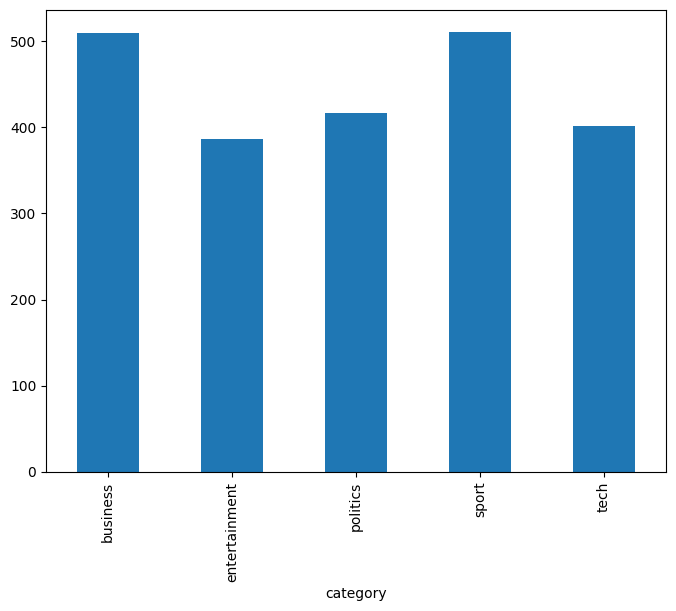

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.text).toarray()
labels = data.category
features.shape

(2225, 14415)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Xtrain)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, Ytrain)

In [7]:
y=(clf.predict(count_vect.transform(Xtest)))
print(classification_report(Ytest, y))

               precision    recall  f1-score   support

     business       0.92      0.96      0.94       106
entertainment       1.00      0.65      0.79        66
     politics       0.88      0.98      0.93        86
        sport       0.90      1.00      0.95       101
         tech       0.96      0.94      0.95        86

     accuracy                           0.92       445
    macro avg       0.93      0.91      0.91       445
 weighted avg       0.93      0.92      0.92       445



In [8]:
#Training model
X_train_counts1 = count_vect.fit_transform(X)
X_train_tfidf1 = tfidf_transformer.fit_transform(X_train_counts1)
mnb= MultinomialNB().fit(X_train_tfidf1, Y)

In [9]:
import pickle

# Assuming mnb and count_vect are your trained model and vectorizer
with open('models/text_classification.pkl', 'wb') as f:
    pickle.dump(mnb, f)
with open('models/count_vect.pkl', 'wb') as f1:
    pickle.dump(count_vect, f1)
